<div>
  <h1>Phân tích dữ liệu hành vi người tiêu dùng E-commerce</h1>
</div>

---
Data được lấy từ Kaggle: https://www.kaggle.com/datasets/salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data/data
  

# 1. Import Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Ecommerce Consumer Behavior/Ecommerce_Consumer_Behavior_Analysis_Data.csv'

df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Ã‰vry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,WiwilÃ­,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


# 2. Overview

In [ ]:
rename_dict = {
    "Customer_ID": "Mã_Khách_Hàng",
    "Age": "Tuổi",
    "Gender": "Giới_Tính",
    "Income_Level": "Mức_Thu_Nhập",
    "Marital_Status": "Tình_Trạng_Hôn_Nhân",
    "Education_Level": "Trình_Độ_Học_Vấn",
    "Occupation": "Nghề_Nghiệp",
    "Location": "Khu_Vực",
    "Purchase_Category": "Danh_Mục_Mua_Hàng",
    "Purchase_Amount": "Số_Tiền_Mua",
    "Frequency_of_Purchase": "Tần_Suất_Mua",
    "Purchase_Channel": "Kênh_Mua",
    "Brand_Loyalty": "Trung_Thành_Thương_Hiệu",
    "Product_Rating": "Đánh_Giá_Sản_Phẩm",
    "Time_Spent_on_Product_Research(hours)": "Thời_Gian_Tìm_Hiểu_Sản_Phẩm",
    "Social_Media_Influence": "Ảnh_Hưởng_Mạng_Xã_Hội",
    "Discount_Sensitivity": "Độ_Nhạy_Cảm_Giá",
    "Return_Rate": "Tỷ_Lệ_Trả_Hàng",
    "Customer_Satisfaction": "Mức_Độ_Hài_Lòng",
    "Engagement_with_Ads": "Tương_Tác_Quảng_Cáo",
    "Device_Used_for_Shopping": "Thiết_Bị_Mua_Sắm",
    "Payment_Method": "Phương_Thức_Thanh_Toán",
    "Time_of_Purchase": "Thời_Gian_Mua",
    "Discount_Used": "Sử_Dụng_Giảm_Giá",
    "Customer_Loyalty_Program_Member": "Thành_Viên_Chương_Trình_Khách_Hàng_Thân_Thiết",
    "Purchase_Intent": "Ý_Định_Mua",
    "Shipping_Preference": "Ưu_Tiên_Vận_Chuyển",
    "Time_to_Decision": "Thời_Gian_Ra_Quyết_Định"
}

df.rename(columns=rename_dict, inplace=True)

df.head()

,Mã_Khách_Hàng,Tuổi,Giới_Tính,Mức_Thu_Nhập,Tình_Trạng_Hôn_Nhân,Trình_Độ_Học_Vấn,Nghề_Nghiệp,Khu_Vực,Danh_Mục_Mua_Hàng,Số_Tiền_Mua,...,Mức_Độ_Hài_Lòng,Tương_Tác_Quảng_Cáo,Thiết_Bị_Mua_Sắm,Phương_Thức_Thanh_Toán,Thời_Gian_Mua,Sử_Dụng_Giảm_Giá,Thành_Viên_Chương_Trình_Khách_Hàng_Thân_Thiết,Ý_Định_Mua,Ưu_Tiên_Vận_Chuyển,Thời_Gian_Ra_Quyết_Định
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Ã‰vry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,WiwilÃ­,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [ ]:
df.shape

(1000, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Mã_Khách_Hàng                                  1000 non-null   object 
 1   Tuổi                                           1000 non-null   int64  
 2   Giới_Tính                                      1000 non-null   object 
 3   Mức_Thu_Nhập                                   1000 non-null   object 
 4   Tình_Trạng_Hôn_Nhân                            1000 non-null   object 
 5   Trình_Độ_Học_Vấn                               1000 non-null   object 
 6   Nghề_Nghiệp                                    1000 non-null   object 
 7   Khu_Vực                                        1000 non-null   object 
 8   Danh_Mục_Mua_Hàng                              1000 non-null   object 
 9   Số_Tiền_Mua                                    1000 n

# 3. Missing value

In [ ]:
# Kiểm tra số lượng và tỉ lệ missing cho toàn bộ dataframe
missing_count = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    "Số_missing": missing_count,
    "Tỉ_lệ_missing (%)": missing_percent
}).sort_values(by="Tỉ_lệ_missing (%)", ascending=False)

print("Tổng số hàng:", len(df))
display(missing_df)

Tổng số hàng: 1000


,Số_missing,Tỉ_lệ_missing (%)
Tương_Tác_Quảng_Cáo,256,25.6
Ảnh_Hưởng_Mạng_Xã_Hội,247,24.7
Mã_Khách_Hàng,0,0.0
Tuổi,0,0.0
Tình_Trạng_Hôn_Nhân,0,0.0
Trình_Độ_Học_Vấn,0,0.0
Nghề_Nghiệp,0,0.0
Khu_Vực,0,0.0
Danh_Mục_Mua_Hàng,0,0.0
Số_Tiền_Mua,0,0.0


- Hai cột có missing:
  - `Tương_Tác_Quảng_Cáo` ~ 25.6%
  - `Ảnh_Hưởng_Mạng_Xã_Hội` ~ 24.7%
- Điền missing = `None`

In [ ]:
# Điền missing bằng "None" cho 2 cột categorical
df["Tương_Tác_Quảng_Cáo"].fillna("None", inplace=True)
df["Ảnh_Hưởng_Mạng_Xã_Hội"].fillna("None", inplace=True)

print(df[["Tương_Tác_Quảng_Cáo", "Ảnh_Hưởng_Mạng_Xã_Hội"]].isnull().sum())

Tương_Tác_Quảng_Cáo      0
Ảnh_Hưởng_Mạng_Xã_Hội    0
dtype: int64


/tmp/ipython-input-2688388797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tương_Tác_Quảng_Cáo"].fillna("None", inplace=True)
/tmp/ipython-input-2688388797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Mã_Khách_Hàng                                  1000 non-null   object 
 1   Tuổi                                           1000 non-null   int64  
 2   Giới_Tính                                      1000 non-null   object 
 3   Mức_Thu_Nhập                                   1000 non-null   object 
 4   Tình_Trạng_Hôn_Nhân                            1000 non-null   object 
 5   Trình_Độ_Học_Vấn                               1000 non-null   object 
 6   Nghề_Nghiệp                                    1000 non-null   object 
 7   Khu_Vực                                        1000 non-null   object 
 8   Danh_Mục_Mua_Hàng                              1000 non-null   object 
 9   Số_Tiền_Mua                                    1000 n

Chuẩn hóa Kiểu Dữ Liệu
- `Số_Tiền_Mua`: chuyển từ object (chuỗi có ký hiệu $) → float
- `Thời_Gian_Mua`: chuyển từ object → datetime
- Gán type `category` cho các cột dạng phân loại: Giới_Tính, Mức_Thu_Nhập, Tình_Trạng_Hôn_Nhân, ...
- Giữ nguyên numeric (int, float), boolean

In [ ]:
# Xử lý cột Số_Tiền_Mua: bỏ ký tự $ và khoảng trắng, đổi về float
df["Số_Tiền_Mua"] = df["Số_Tiền_Mua"].replace('[\$,]', '', regex=True).astype(float)

# Chuyển Thời_Gian_Mua về datetime
df["Thời_Gian_Mua"] = pd.to_datetime(df["Thời_Gian_Mua"], errors="coerce")

categorical_cols = [
    "Giới_Tính", "Mức_Thu_Nhập", "Tình_Trạng_Hôn_Nhân", "Trình_Độ_Học_Vấn",
    "Nghề_Nghiệp", "Khu_Vực", "Danh_Mục_Mua_Hàng", "Kênh_Mua",
    "Ảnh_Hưởng_Mạng_Xã_Hội", "Độ_Nhạy_Cảm_Giá", "Tương_Tác_Quảng_Cáo",
    "Thiết_Bị_Mua_Sắm", "Phương_Thức_Thanh_Toán", "Ý_Định_Mua", "Ưu_Tiên_Vận_Chuyển"
]

for col in categorical_cols:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Mã_Khách_Hàng                                  1000 non-null   object        
 1   Tuổi                                           1000 non-null   int64         
 2   Giới_Tính                                      1000 non-null   category      
 3   Mức_Thu_Nhập                                   1000 non-null   category      
 4   Tình_Trạng_Hôn_Nhân                            1000 non-null   category      
 5   Trình_Độ_Học_Vấn                               1000 non-null   category      
 6   Nghề_Nghiệp                                    1000 non-null   category      
 7   Khu_Vực                                        1000 non-null   category      
 8   Danh_Mục_Mua_Hàng                              1000 non-nul

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-654336065.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["Số_Tiền_Mua"] = df["Số_Tiền_Mua"].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df.describe()

,Tuổi,Số_Tiền_Mua,Tần_Suất_Mua,Trung_Thành_Thương_Hiệu,Đánh_Giá_Sản_Phẩm,Thời_Gian_Tìm_Hiểu_Sản_Phẩm,Tỷ_Lệ_Trả_Hàng,Mức_Độ_Hài_Lòng,Thời_Gian_Mua,Thời_Gian_Ra_Quyết_Định
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
mean,34.304000,275.063880,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,2024-06-29 06:31:40.800000,7.547000
min,18.000000,50.710000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2024-01-01 00:00:00,1.000000
25%,26.000000,162.235000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,2024-04-04 00:00:00,4.000000
50%,34.500000,276.165000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,2024-06-30 00:00:00,8.000000
75%,42.000000,388.982500,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,2024-09-19 00:00:00,11.000000
max,50.000000,498.330000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,2024-12-30 00:00:00,14.000000
std,9.353238,131.532998,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,NaN,4.035849


Nhận xét
1. Tuổi (18–50, mean ≈ 34.3)
    - Min = 18, Max = 50 → phân bố hợp lý cho khách hàng mua sắm online.
    - Mean = 34.3, Median (50%) = 34.5 → khá cân đối, không bị lệch nhiều.
    - Std = 9.35 → phân tán vừa phải, có cả khách trẻ và khách trung niên.
2. Số_Tiền_Mua (≈ 50 – 498, mean ≈ 275)
    - Min = 50.7, Max ≈ 498.3 → dải giá trị hợp lý cho hành vi mua hàng.
    - Mean = 275, Median ≈ 276 → trung bình mua khoảng 270–280 đơn vị tiền.
    - Std = 131.5 → phân tán khá lớn, có nhóm mua ít và nhóm chi nhiều.
3. Tần_Suất_Mua (2–12 lần, mean ≈ 7)
    - Min = 2, Max = 12 → có giới hạn, đúng như thang đo hành vi.
    - Mean ≈ 7, Median = 7 → trung bình 1 khách mua 7 lần.
    - Phân bố khá đều (Std = 3.15).
4. Trung_Thành_Thương_Hiệu (1–5, mean ≈ 3.0)
    - Thang đo Likert 1–5.
    - Mean = 3.0 → mức trung bình, chưa có nhiều khách quá trung thành.
5. Đánh_Giá_Sản_Phẩm (1–5, mean ≈ 3.0)
    - Min = 1, Max = 5 → chuẩn rating.
    - Mean ≈ 3.03 → mức hài lòng trung bình.
6. Thời_Gian_Tìm_Hiểu_Sản_Phẩm (0–2h, mean ≈ 1h)
    - Min = 0, Max = 2 → đúng dạng số giờ.
    - Mean ≈ 1h → trung bình khách mất 1 tiếng để nghiên cứu.
    - 25% khách hầu như không nghiên cứu (0h).
7. Tỷ_Lệ_Trả_Hàng (0–2, mean ≈ 1.0)
    - Min = 0, Max = 2 → dạng discrete scale (0 = không trả, 1 = ít, 2 = nhiều).
    - Mean = 0.95 → khá cân bằng.
8. Mức_Độ_Hài_Lòng (1–10, mean ≈ 5.4)
    - Min = 1, Max = 10 → thang đo Likert 10 điểm.
    - Mean ≈ 5.4, Median = 5 → hài lòng ở mức trung bình.
    - Std ≈ 2.86 → có sự phân tán lớn, nghĩa là có cả khách rất hài lòng lẫn không hài lòng.
9. Thời_Gian_Mua (2024-01-01 → 2024-12-30)
    - Trải dài cả năm 2024.
    - Có thể phân tích theo tháng, theo mùa, theo dịp lễ.
10. Thời_Gian_Ra_Quyết_Định (1–14, mean ≈ 7.5)
    - Min = 1, Max = 14 → đơn vị có thể là ngày.
    - Mean ≈ 7.5 ngày → trung bình khách mất 1 tuần để quyết định.
    - Std ≈ 4.0 → có nhóm quyết định nhanh, có nhóm lâu.

Kiểm tra Outlier
- Sử dụng phương pháp IQR để phát hiện ngoại lệ
- Vẽ boxplot cho các biến quan trọng: Tuổi, Số_Tiền_Mua, Tần_Suất_Mua, Thời_Gian_Ra_Quyết_Định

Ngưỡng dưới: 2.0, Ngưỡng trên: 66.0
Số lượng outlier Tuổi: 0


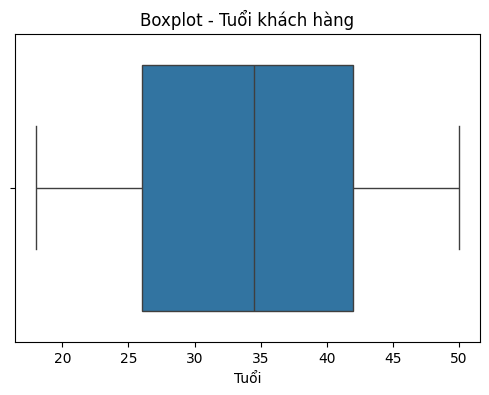

In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_age, lb, ub = detect_outliers_iqr(df, "Tuổi")
print(f"Ngưỡng dưới: {lb}, Ngưỡng trên: {ub}")
print(f"Số lượng outlier Tuổi: {len(outliers_age)}")

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Tuổi"])
plt.title("Boxplot - Tuổi khách hàng")
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Các cột numeric:", numeric_cols)

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_summary[col] = {
        "Ngưỡng dưới": lower_bound,
        "Ngưỡng trên": upper_bound,
        "Số lượng outlier": outliers.shape[0],
        "Tỉ lệ (%)": round(outliers.shape[0] / len(df) * 100, 2)
    }

import pandas as pd
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df

Các cột numeric: ['Tuổi', 'Số_Tiền_Mua', 'Tần_Suất_Mua', 'Trung_Thành_Thương_Hiệu', 'Đánh_Giá_Sản_Phẩm', 'Thời_Gian_Tìm_Hiểu_Sản_Phẩm', 'Tỷ_Lệ_Trả_Hàng', 'Mức_Độ_Hài_Lòng', 'Thời_Gian_Ra_Quyết_Định']


,Ngưỡng dưới,Ngưỡng trên,Số lượng outlier,Tỉ lệ (%)
Tuổi,2.00000,66.00000,0.0,0.0
Số_Tiền_Mua,-177.88625,729.10375,0.0,0.0
Tần_Suất_Mua,-5.00000,19.00000,0.0,0.0
Trung_Thành_Thương_Hiệu,-1.00000,7.00000,0.0,0.0
Đánh_Giá_Sản_Phẩm,-1.00000,7.00000,0.0,0.0
Thời_Gian_Tìm_Hiểu_Sản_Phẩm,-3.00000,5.00000,0.0,0.0
Tỷ_Lệ_Trả_Hàng,-3.00000,5.00000,0.0,0.0
Mức_Độ_Hài_Lòng,-4.50000,15.50000,0.0,0.0
Thời_Gian_Ra_Quyết_Định,-6.50000,21.50000,0.0,0.0


# 4. Phân tích phân phối dữ liệu đơn biến

## 1. Biến số (Numeric Columns)
- `Tuổi`
- `Số_Tiền_Mua`
- `Tần_Suất_Mua`
- `Trung_Thành_Thương_Hiệu`
- `Đánh_Giá_Sản_Phẩm`
- `Thời_Gian_Tìm_Hiểu_Sản_Phẩm`
- `Tỷ_Lệ_Trả_Hàng`
- `Mức_Độ_Hài_Lòng`
- `Thời_Gian_Ra_Quyết_Định`

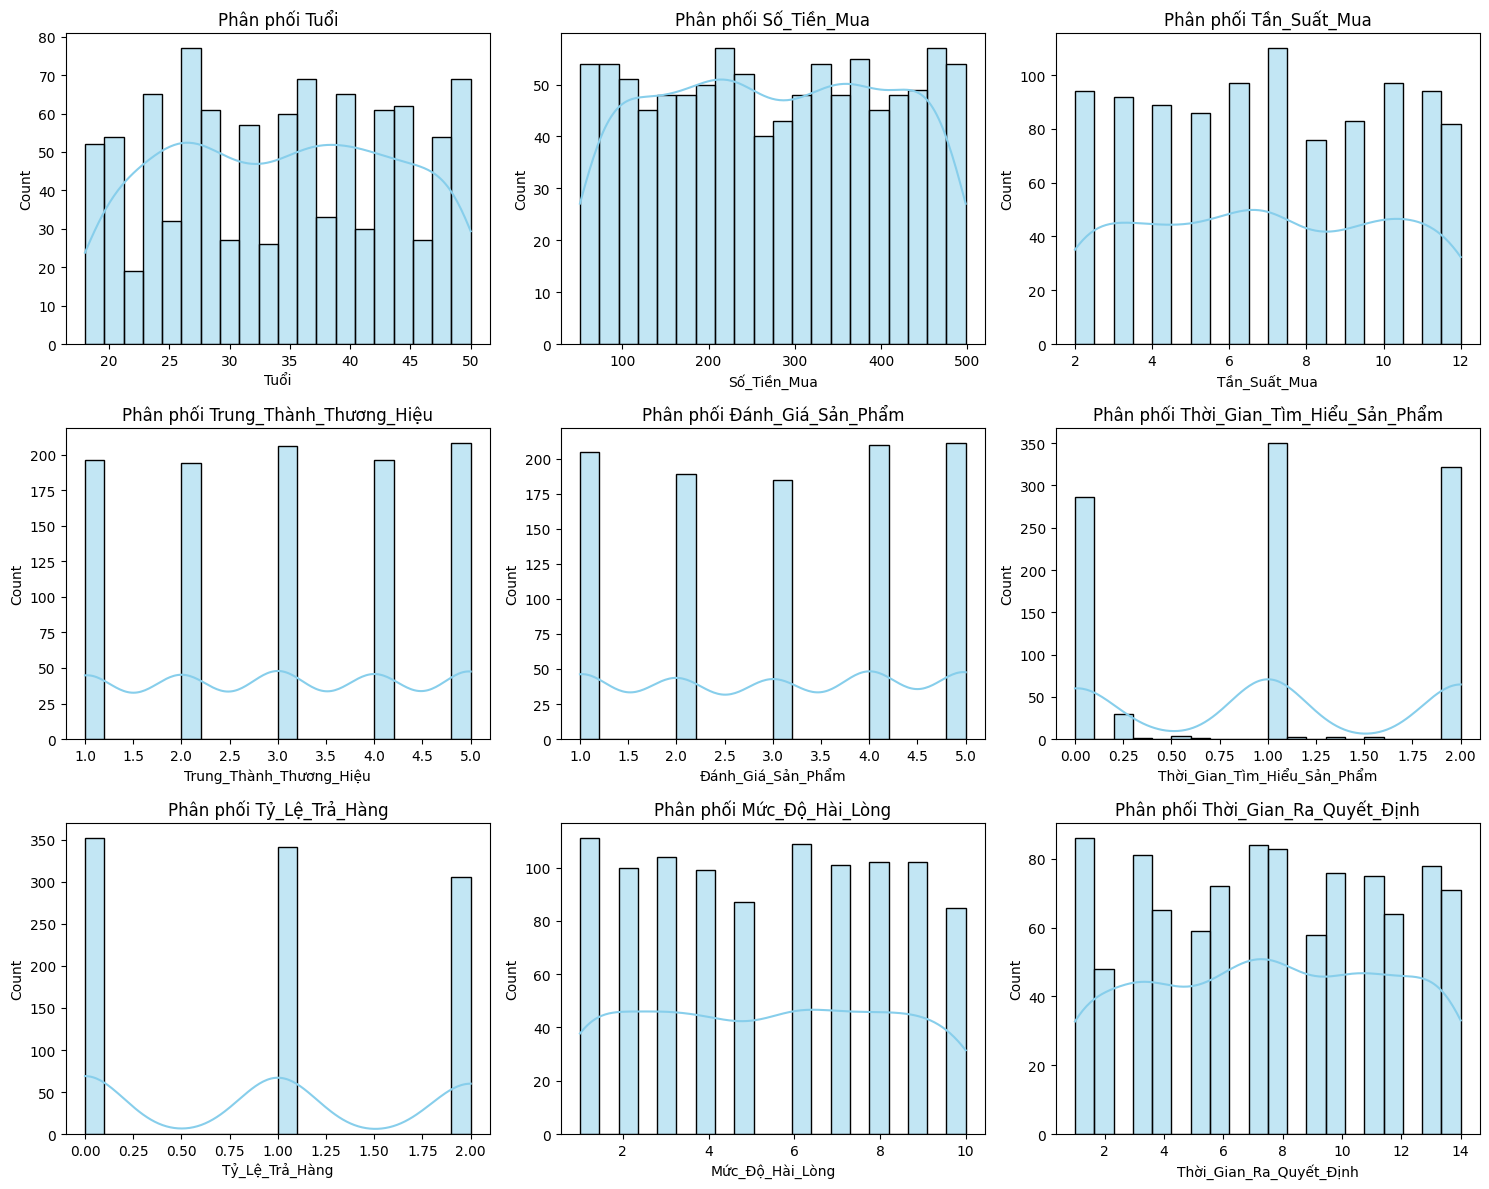

In [ ]:
numeric_cols = ['Tuổi', 'Số_Tiền_Mua', 'Tần_Suất_Mua',
                'Trung_Thành_Thương_Hiệu', 'Đánh_Giá_Sản_Phẩm',
                'Thời_Gian_Tìm_Hiểu_Sản_Phẩm', 'Tỷ_Lệ_Trả_Hàng',
                'Mức_Độ_Hài_Lòng', 'Thời_Gian_Ra_Quyết_Định']

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Phân phối {col}')

plt.tight_layout()
plt.show()

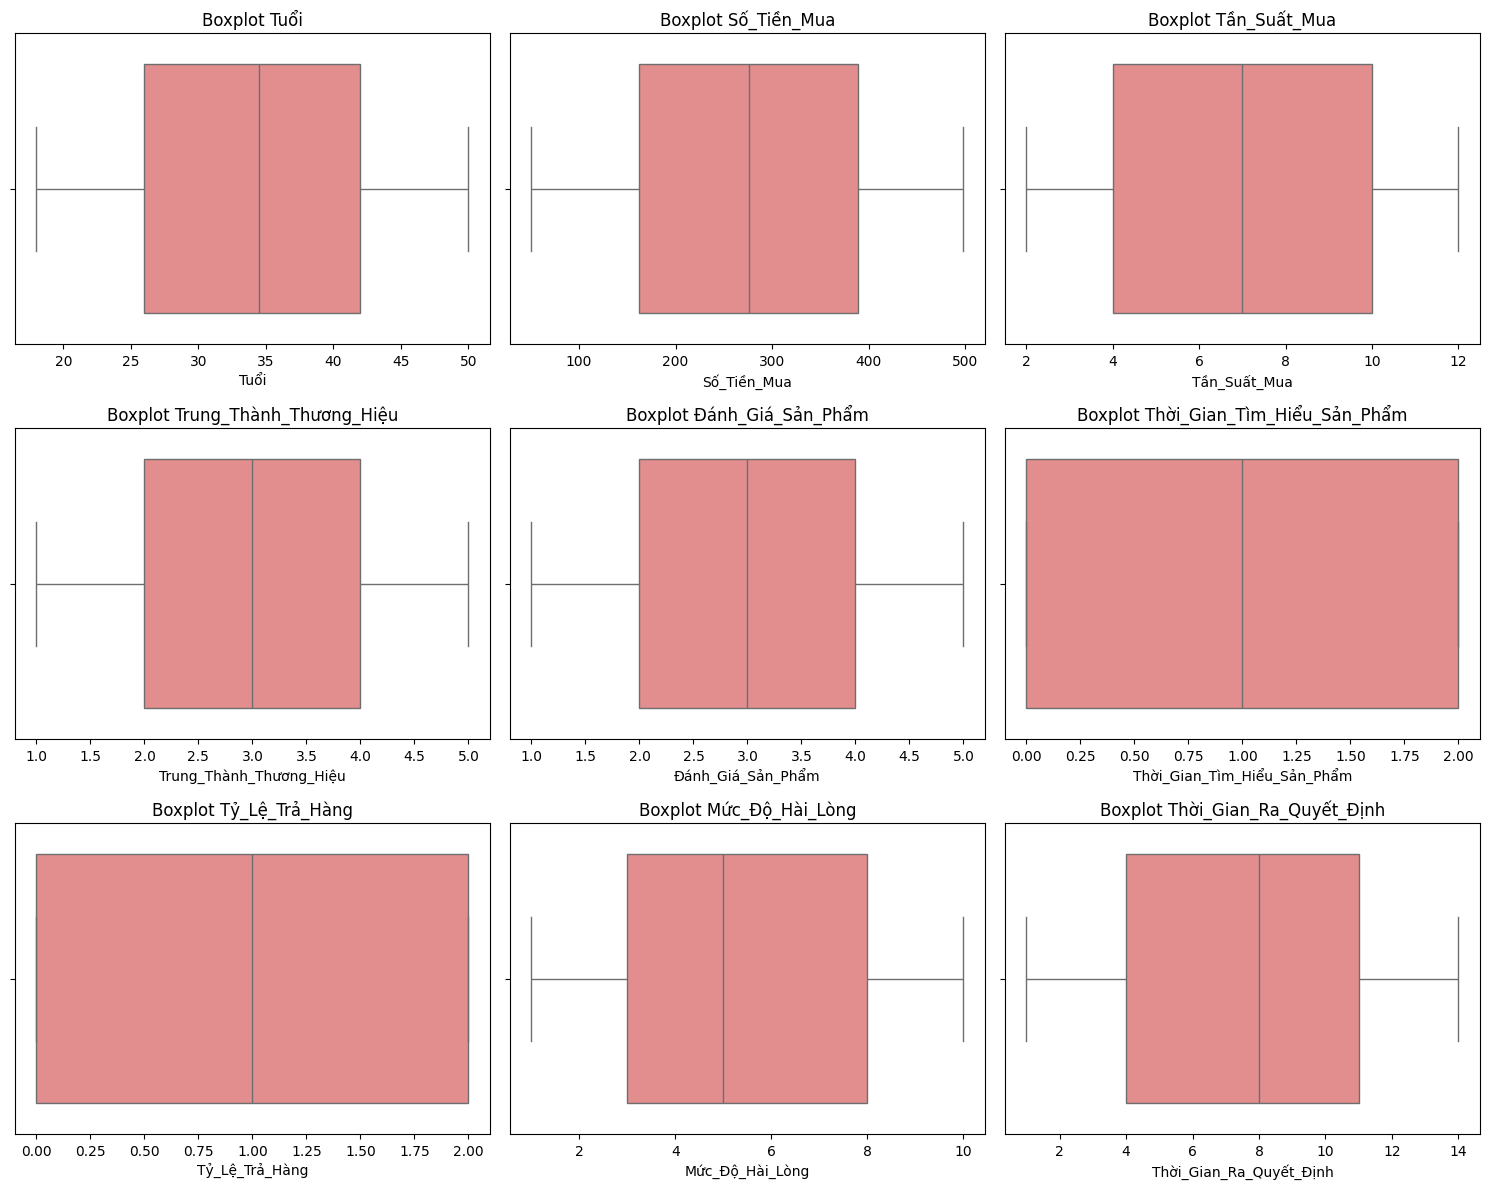

In [ ]:
# Vẽ boxplot để xem outlier trực quan
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

## 2. Biến phân loại (Categorical Columns)
- `Giới_Tính`
- `Tình_Trạng_Hôn_Nhân`
- `Trình_Độ_Học_Vấn`
- `Nghề_Nghiệp`
- `Khu_Vực`
- `Danh_Mục_Mua_Hàng`
- `Phương_Thức_Thanh_Toán`
- `Thành_Viên_Chương_Trình_Trung_Thành`
- `Ý_Định_Mua`
- `Ưu_Tiên_Giao_Hàng`
- `Tương_Tác_Quảng_Cáo`
- `Ảnh_Hưởng_Mạng_Xã_Hội`

In [ ]:
print(df.columns.tolist())

['Mã_Khách_Hàng', 'Tuổi', 'Giới_Tính', 'Mức_Thu_Nhập', 'Tình_Trạng_Hôn_Nhân', 'Trình_Độ_Học_Vấn', 'Nghề_Nghiệp', 'Khu_Vực', 'Danh_Mục_Mua_Hàng', 'Số_Tiền_Mua', 'Tần_Suất_Mua', 'Kênh_Mua', 'Trung_Thành_Thương_Hiệu', 'Đánh_Giá_Sản_Phẩm', 'Thời_Gian_Tìm_Hiểu_Sản_Phẩm', 'Ảnh_Hưởng_Mạng_Xã_Hội', 'Độ_Nhạy_Cảm_Giá', 'Tỷ_Lệ_Trả_Hàng', 'Mức_Độ_Hài_Lòng', 'Tương_Tác_Quảng_Cáo', 'Thiết_Bị_Mua_Sắm', 'Phương_Thức_Thanh_Toán', 'Thời_Gian_Mua', 'Sử_Dụng_Giảm_Giá', 'Thành_Viên_Chương_Trình_Khách_Hàng_Thân_Thiết', 'Ý_Định_Mua', 'Ưu_Tiên_Vận_Chuyển', 'Thời_Gian_Ra_Quyết_Định']


/tmp/ipython-input-819307318.py:20: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-819307318.py:20: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-819307318.py:20: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-819307318.py:20: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

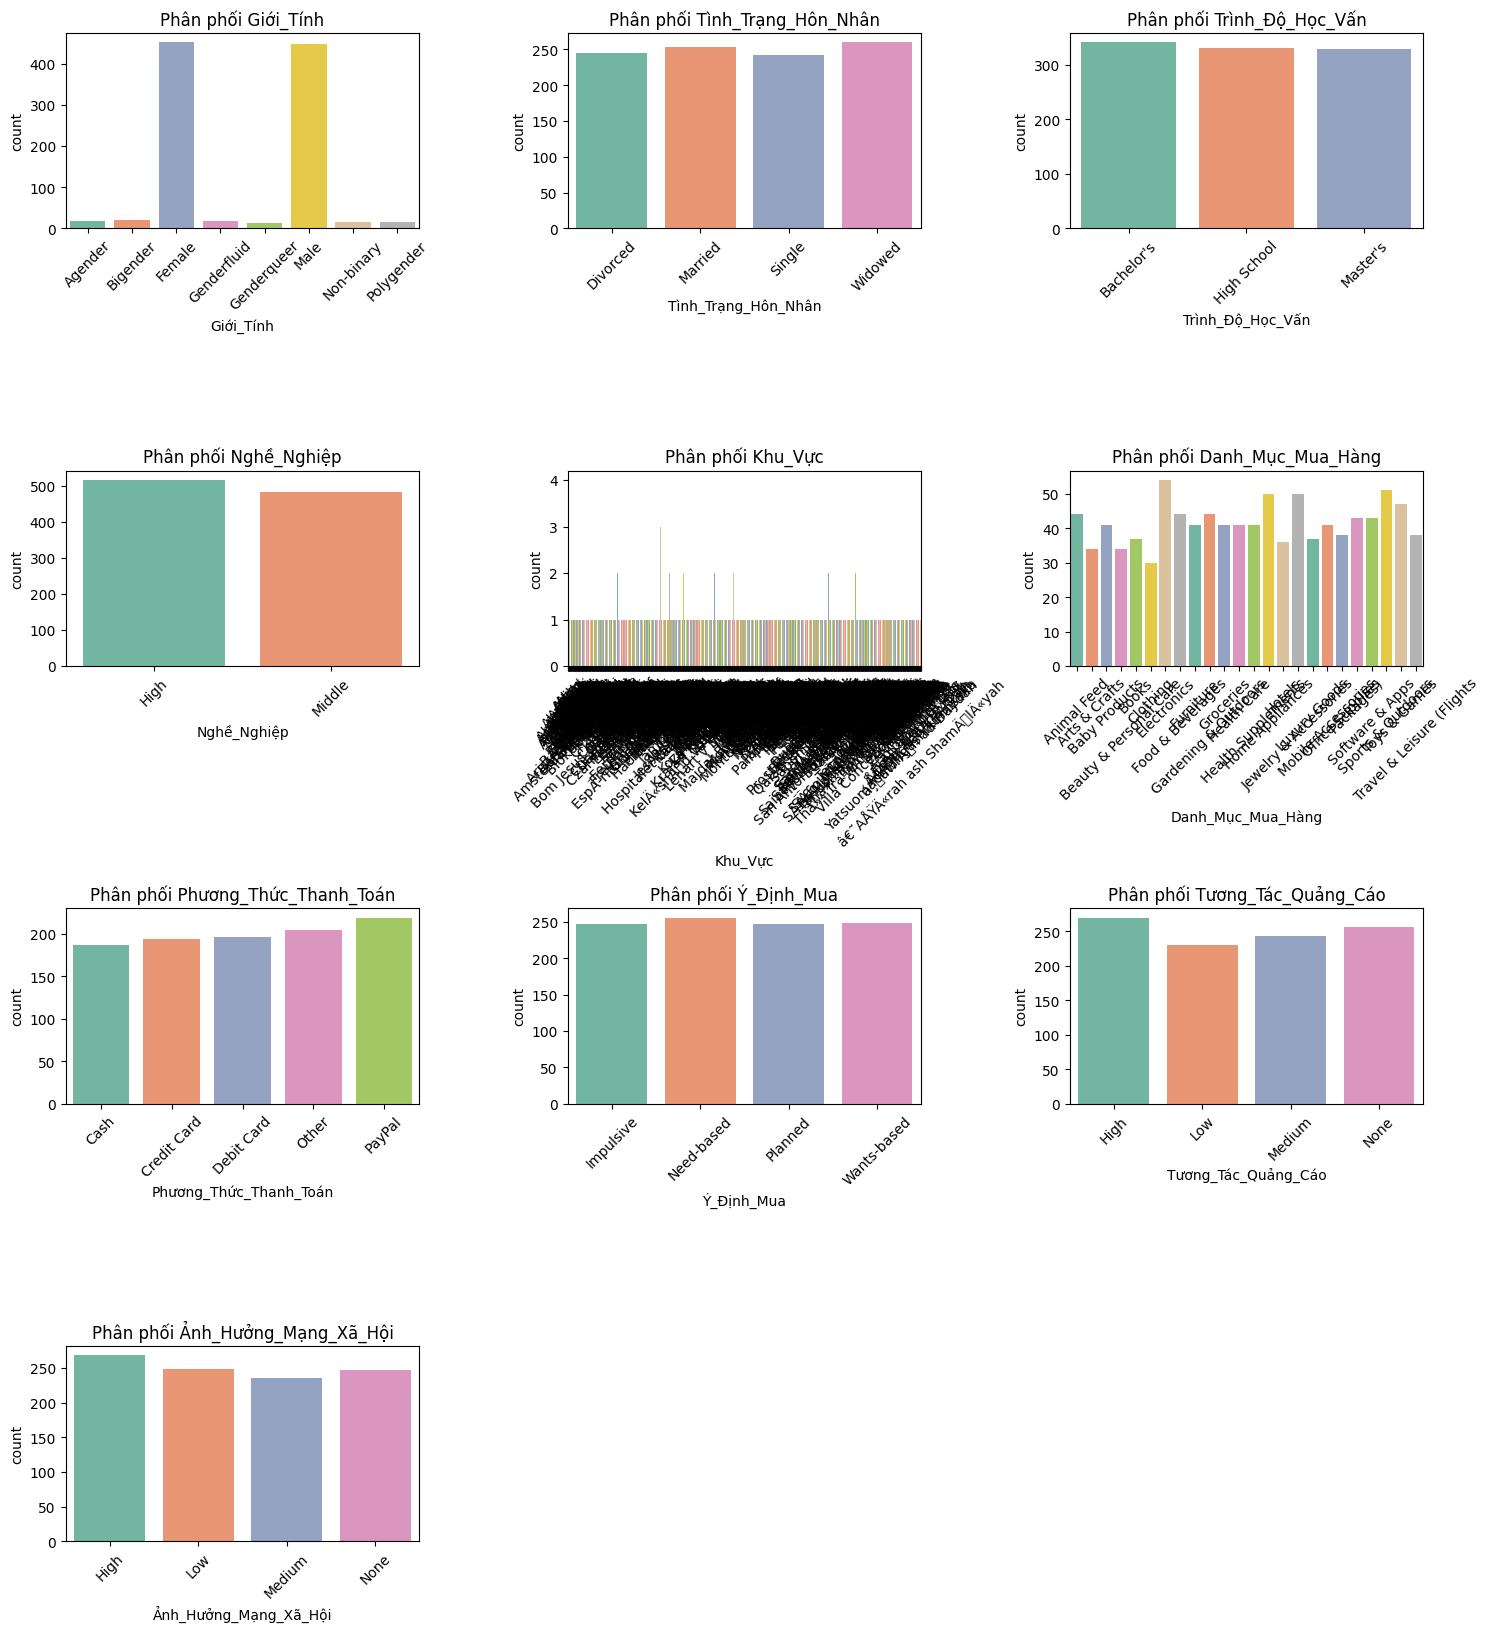

In [ ]:
# Giữ nguyên list ban đầu
categorical_cols = ['Giới_Tính', 'Tình_Trạng_Hôn_Nhân', 'Trình_Độ_Học_Vấn',
                    'Nghề_Nghiệp', 'Khu_Vực', 'Danh_Mục_Mua_Hàng', 'Phương_Thức_Thanh_Toán',
                    'Thành_Viên_Chương_Trình_Trung_Thành', 'Ý_Định_Mua',
                    'Ưu_Tiên_Giao_Hàng', 'Tương_Tác_Quảng_Cáo',
                    'Ảnh_Hưởng_Mạng_Xã_Hội']

# Chỉ giữ lại cột nào có trong df
categorical_cols = [col for col in categorical_cols if col in df.columns]

plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="Set2", legend=False)
    plt.title(f'Phân phối {col}')
    plt.xticks(rotation=45)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.tight_layout()
plt.show()

# 5. Phân tích phân phối dữ liệu đa biến

Numeric vs Ý_Định_Mua

/tmp/ipython-input-47721530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ý_Định_Mua', y=col, data=df, palette="Set3")
/tmp/ipython-input-47721530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ý_Định_Mua', y=col, data=df, palette="Set3")
/tmp/ipython-input-47721530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ý_Định_Mua', y=col, data=df, palette="Set3")
/tmp/ipython-input-47721530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

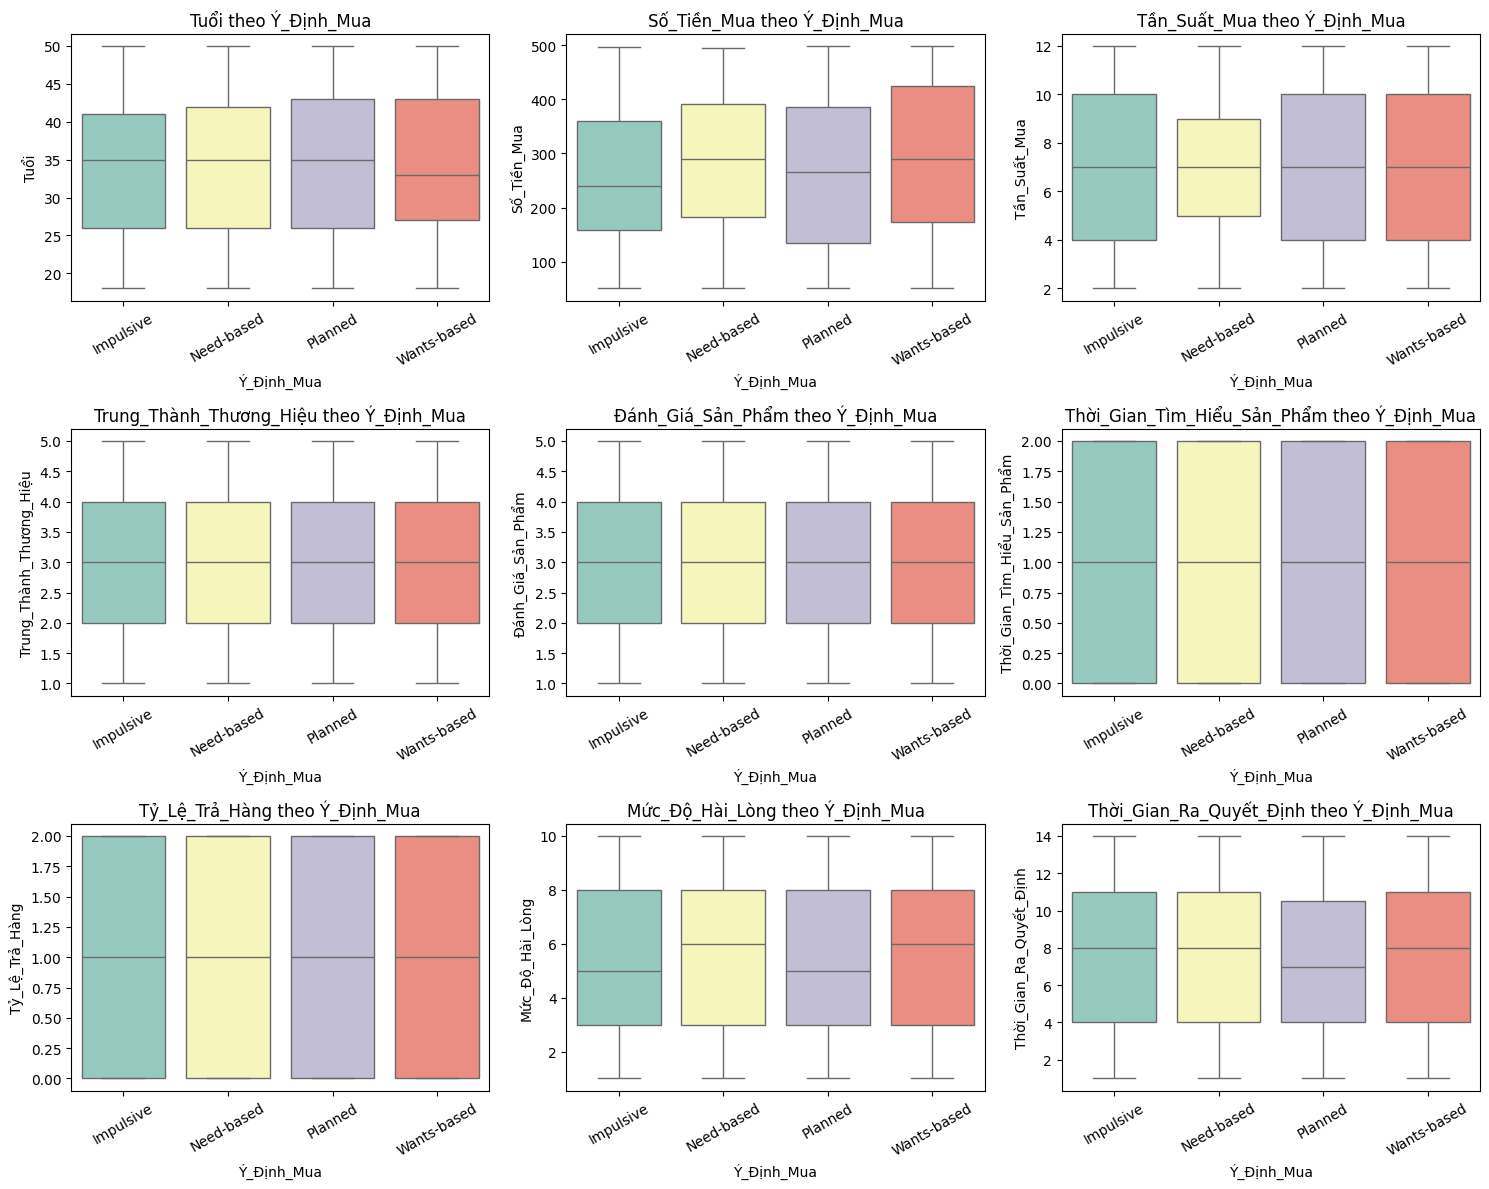

In [ ]:
# Numeric vs Ý_Định_Mua
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Ý_Định_Mua', y=col, data=df, palette="Set3")
    plt.title(f'{col} theo Ý_Định_Mua')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


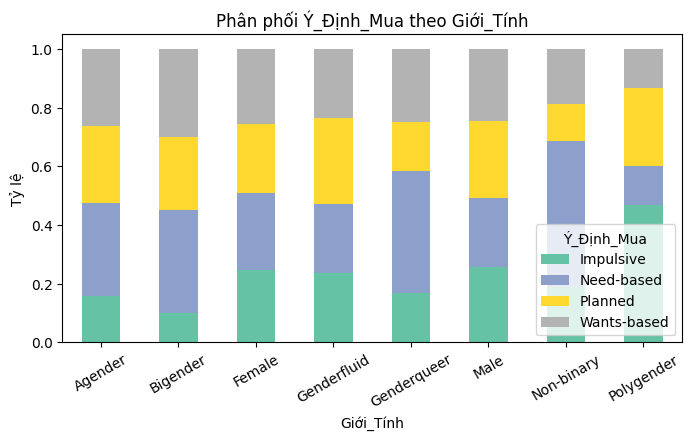

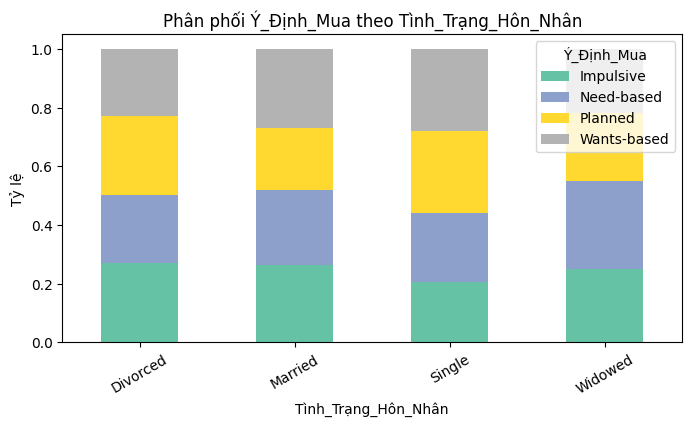

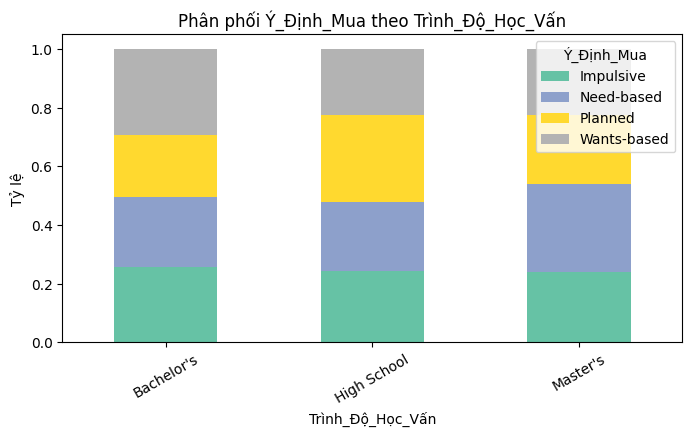

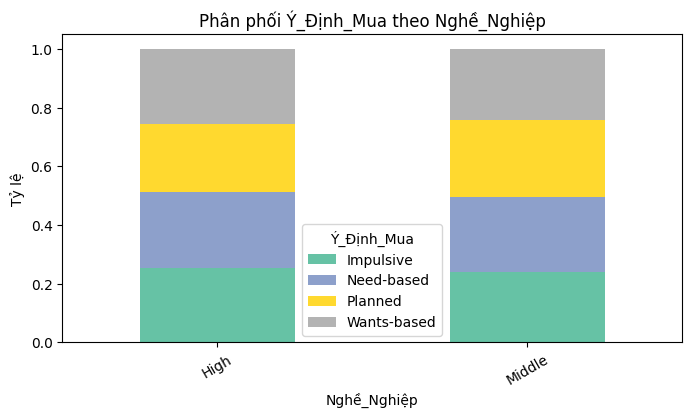

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


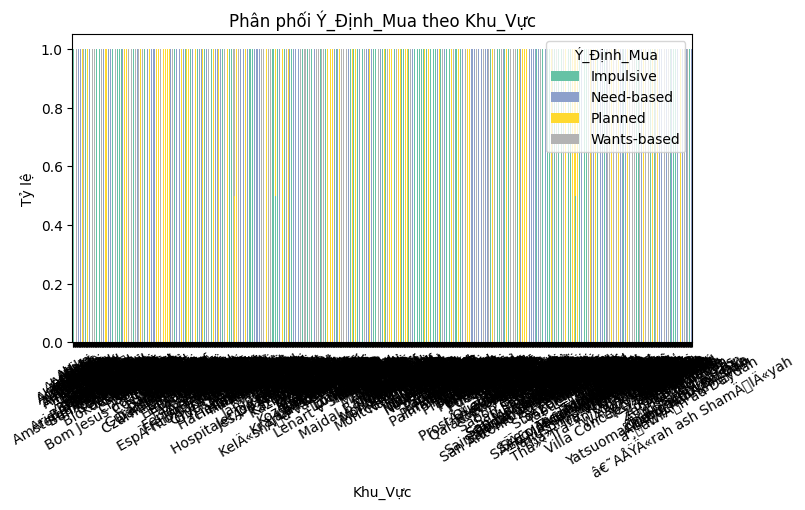

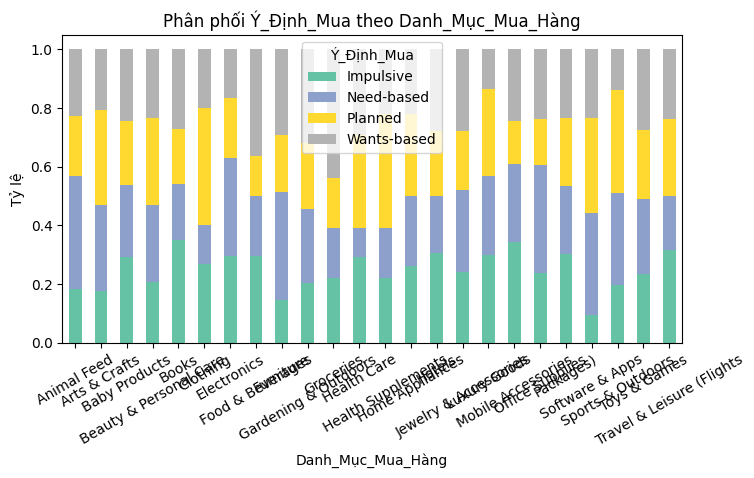

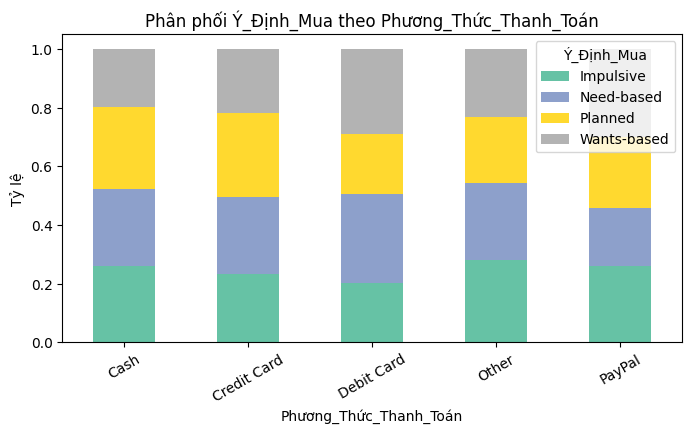

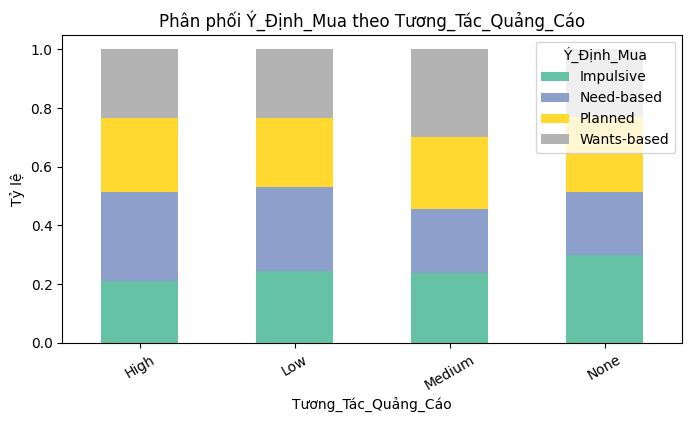

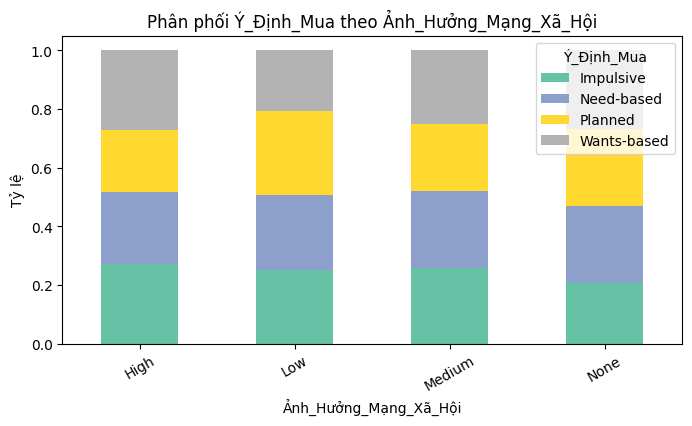

In [ ]:
# Categorical vs Ý_Định_Mua
for col in categorical_cols:
    if col != 'Ý_Định_Mua':
        ct = pd.crosstab(df[col], df['Ý_Định_Mua'], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=(8,4), colormap="Set2")
        plt.title(f'Phân phối Ý_Định_Mua theo {col}')
        plt.ylabel('Tỷ lệ')
        plt.xticks(rotation=30)
        plt.legend(title='Ý_Định_Mua')
        plt.show()


# 6. Visualization & Insight

Doanh thu theo `Danh mục sản phẩm`

/tmp/ipython-input-2913247287.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Danh_Mục_Mua_Hàng")["Số_Tiền_Mua"].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")


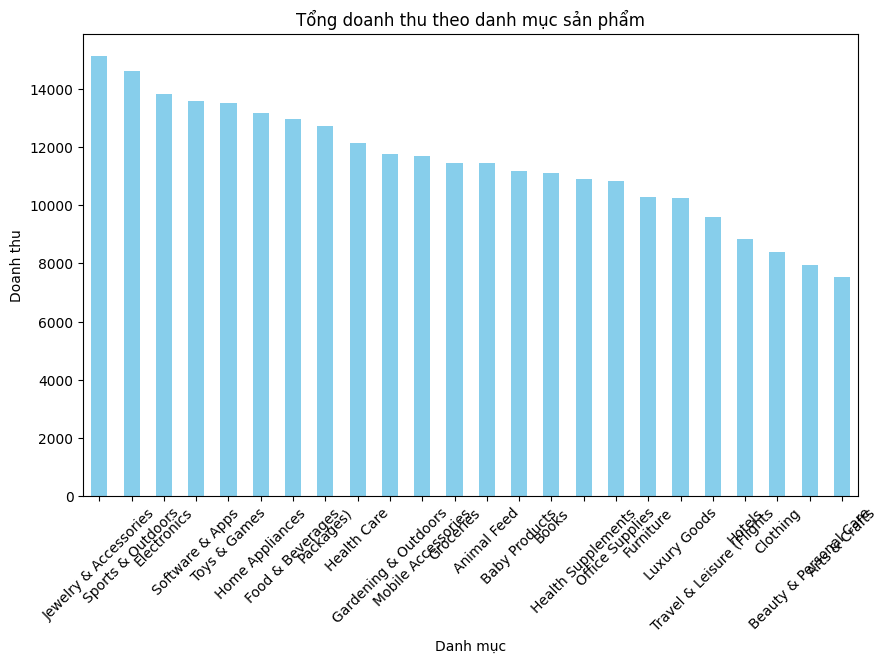

In [ ]:
plt.figure(figsize=(10,6))
df.groupby("Danh_Mục_Mua_Hàng")["Số_Tiền_Mua"].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Tổng doanh thu theo danh mục sản phẩm")
plt.ylabel("Doanh thu")
plt.xlabel("Danh mục")
plt.xticks(rotation=45)
plt.show()

- Nhận xét: Jewelry & Accessories & Sports & Outdoors là nhóm mang lại doanh thu chính trên 14,000 đô. Doanh nghiệp có thể ưu tiên đầu tư marketing, quảng cáo, khuyến mãi, cross-sell ở nhóm này để duy trì và gia tăng lợi nhuận.
- Arts & Crafts: Doanh thu < 8,000$, thấp hơn hẳn so với các danh mục khác.
- Có 2 khả năng:
    - Nhu cầu thấp → khách hàng ít quan tâm, nên cân nhắc có nên tiếp tục duy trì.
    - Marketing/hiển thị kém → sản phẩm có tiềm năng nhưng chưa được quảng bá đúng cách.

Doanh thu theo `Kênh mua`

/tmp/ipython-input-426248800.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Kênh_Mua")["Số_Tiền_Mua"].sum().plot(kind="bar", color="lightcoral")


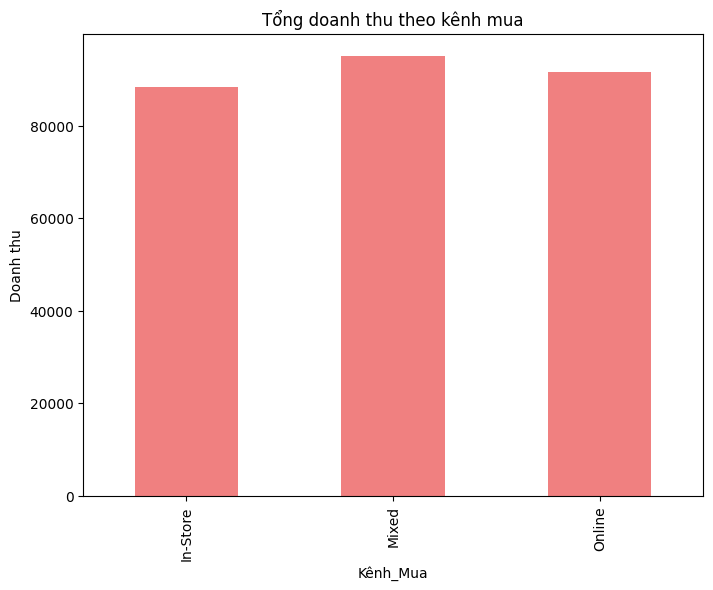

In [ ]:
plt.figure(figsize=(8,6))
df.groupby("Kênh_Mua")["Số_Tiền_Mua"].sum().plot(kind="bar", color="lightcoral")
plt.title("Tổng doanh thu theo kênh mua")
plt.ylabel("Doanh thu")
plt.show()


Nhận xét: Doanh thu so với các nền tảng khá đồng đều

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Mã_Khách_Hàng                                  1000 non-null   object  
 1   Tuổi                                           1000 non-null   int64   
 2   Giới_Tính                                      1000 non-null   category
 3   Mức_Thu_Nhập                                   1000 non-null   category
 4   Tình_Trạng_Hôn_Nhân                            1000 non-null   category
 5   Trình_Độ_Học_Vấn                               1000 non-null   category
 6   Nghề_Nghiệp                                    1000 non-null   category
 7   Khu_Vực                                        1000 non-null   category
 8   Danh_Mục_Mua_Hàng                              1000 non-null   category
 9   Số_Tiền_Mua                               

In [ ]:
df['Thời_Gian_Mua'] = pd.to_datetime(df['Thời_Gian_Mua'], errors='coerce')

df['Thời_Gian_Mua_Date'] = df['Thời_Gian_Mua'].dt.date

df['Month'] = df['Thời_Gian_Mua'].dt.to_period('M')

Doanh thu theo `Tháng`

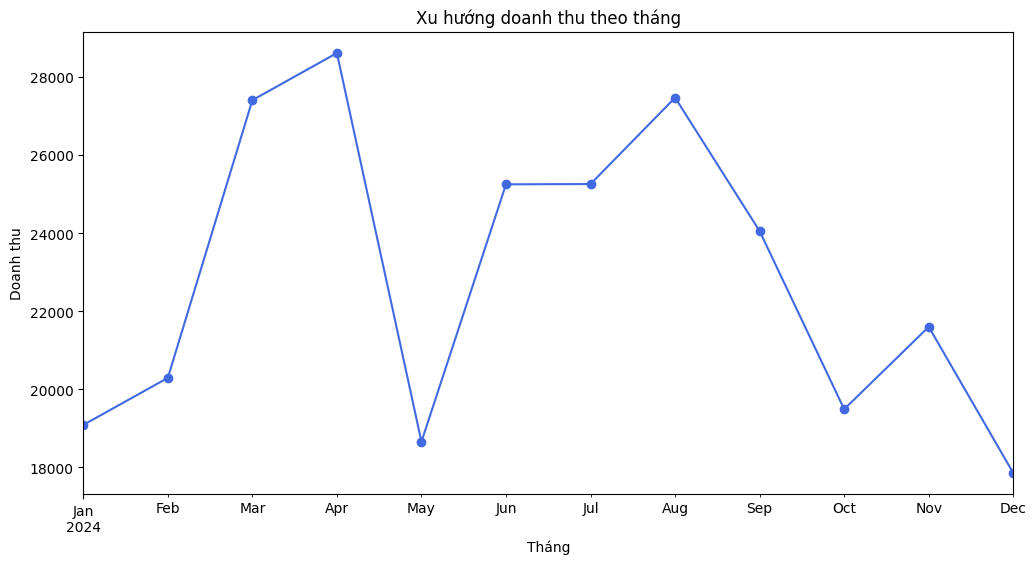

In [ ]:
df['Month'] = df['Thời_Gian_Mua'].dt.to_period('M')

plt.figure(figsize=(12,6))
df.groupby("Month")["Số_Tiền_Mua"].sum().plot(kind="line", marker='o', color="royalblue")
plt.title("Xu hướng doanh thu theo tháng")
plt.ylabel("Doanh thu")
plt.xlabel("Tháng")
plt.show()


Nhận xét:
  - Tháng 4: Có thể trùng với dịp lễ tiêu dùng có xu hướng mua sắm nhiều hơn (đặc biệt là ăn uống, quà tặng).
  - Tháng 8: Có thể liên quan đến lễ Vu Lan (7 âm lịch), mùa tựu trường, nhiều gia đình chi tiêu cho quà tặng, sách vở, dịch vụ.

  - Tháng 5 và 10: Đây thường là giai đoạn ít lễ lớn, nhu cầu mua sắm giảm, có thể là “low season”.

/tmp/ipython-input-3319043985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ý_Định_Mua", y="Số_Tiền_Mua", data=df, palette="Set2")


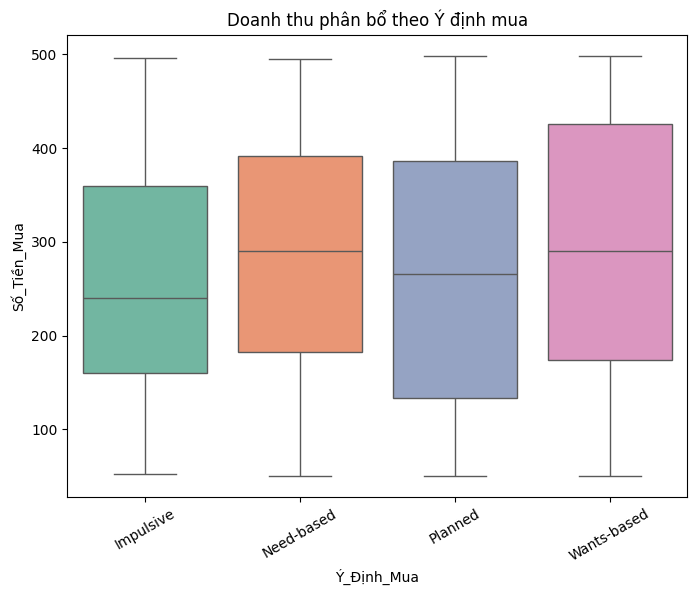

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Ý_Định_Mua", y="Số_Tiền_Mua", data=df, palette="Set2")
plt.title("Doanh thu phân bổ theo Ý định mua")
plt.xticks(rotation=30)
plt.show()


# 7. Modeling Prep

`dimCustomer`

In [ ]:
dimCustomer = df[[
    "Mã_Khách_Hàng", "Tuổi", "Giới_Tính", "Mức_Thu_Nhập",
    "Tình_Trạng_Hôn_Nhân", "Trình_Độ_Học_Vấn", "Nghề_Nghiệp",
    "Khu_Vực", "Thành_Viên_Chương_Trình_Khách_Hàng_Thân_Thiết"
]].drop_duplicates().reset_index(drop=True)

`dimProduct`

In [ ]:
dimProduct = df[[
    "Danh_Mục_Mua_Hàng"
]].drop_duplicates().reset_index(drop=True)
dimProduct["ProductKey"] = dimProduct.index + 1

`dimChanel`

In [ ]:
dimChannel = df[[
    "Kênh_Mua", "Thiết_Bị_Mua_Sắm", "Phương_Thức_Thanh_Toán"
]].drop_duplicates().reset_index(drop=True)
dimChannel["ChannelKey"] = dimChannel.index + 1

`dimMarketing`

In [ ]:
dimMarketing = df[[
    "Tương_Tác_Quảng_Cáo", "Ảnh_Hưởng_Mạng_Xã_Hội", "Độ_Nhạy_Cảm_Giá",
    "Sử_Dụng_Giảm_Giá", "Ưu_Tiên_Vận_Chuyển"
]].drop_duplicates().reset_index(drop=True)
dimMarketing["MarketingKey"] = dimMarketing.index + 1

`dimTime`

In [ ]:
dimTime = df[["Thời_Gian_Mua_Date"]].drop_duplicates().reset_index(drop=True)

In [ ]:
factSales = df[[
    "Mã_Khách_Hàng", "Danh_Mục_Mua_Hàng", "Kênh_Mua", "Thiết_Bị_Mua_Sắm",
    "Phương_Thức_Thanh_Toán", "Tương_Tác_Quảng_Cáo", "Ảnh_Hưởng_Mạng_Xã_Hội",
    "Độ_Nhạy_Cảm_Giá", "Sử_Dụng_Giảm_Giá", "Ưu_Tiên_Vận_Chuyển",
    "Thời_Gian_Mua_Date", "Ý_Định_Mua",
    "Số_Tiền_Mua", "Tần_Suất_Mua", "Trung_Thành_Thương_Hiệu",
    "Đánh_Giá_Sản_Phẩm", "Thời_Gian_Tìm_Hiểu_Sản_Phẩm",
    "Tỷ_Lệ_Trả_Hàng", "Mức_Độ_Hài_Lòng", "Thời_Gian_Ra_Quyết_Định"
]].copy()


In [ ]:
# Thêm key vào factSales từ các dim table
# ProductKey
factSales = factSales.merge(dimProduct, on="Danh_Mục_Mua_Hàng", how="left")

# ChannelKey
factSales = factSales.merge(dimChannel, on=["Kênh_Mua", "Thiết_Bị_Mua_Sắm", "Phương_Thức_Thanh_Toán"], how="left")

# MarketingKey
factSales = factSales.merge(dimMarketing, on=[
    "Tương_Tác_Quảng_Cáo", "Ảnh_Hưởng_Mạng_Xã_Hội", "Độ_Nhạy_Cảm_Giá",
    "Sử_Dụng_Giảm_Giá", "Ưu_Tiên_Vận_Chuyển"
], how="left")

# Giữ lại các cột key và measures
factSales_star = factSales[[
    "Mã_Khách_Hàng", "ProductKey", "ChannelKey", "MarketingKey",
    "Thời_Gian_Mua_Date", "Ý_Định_Mua",
    "Số_Tiền_Mua", "Tần_Suất_Mua", "Trung_Thành_Thương_Hiệu",
    "Đánh_Giá_Sản_Phẩm", "Thời_Gian_Tìm_Hiểu_Sản_Phẩm",
    "Tỷ_Lệ_Trả_Hàng", "Mức_Độ_Hài_Lòng", "Thời_Gian_Ra_Quyết_Định"
]].copy()


In [ ]:
factSales_star.head(20)

,Mã_Khách_Hàng,ProductKey,ChannelKey,MarketingKey,Thời_Gian_Mua_Date,Ý_Định_Mua,Số_Tiền_Mua,Tần_Suất_Mua,Trung_Thành_Thương_Hiệu,Đánh_Giá_Sản_Phẩm,Thời_Gian_Tìm_Hiểu_Sản_Phẩm,Tỷ_Lệ_Trả_Hàng,Mức_Độ_Hài_Lòng,Thời_Gian_Ra_Quyết_Định
0,37-611-6911,1,1,1,2024-03-01,Need-based,333.80,4,5,5,2.0,1,7,2
1,29-392-9296,2,2,2,2024-04-16,Wants-based,222.22,11,3,1,2.0,1,5,6
2,84-649-5117,3,3,3,2024-03-15,Impulsive,426.22,2,5,5,0.3,1,7,3
3,48-980-6078,4,4,4,2024-10-04,Need-based,101.31,6,3,1,1.0,0,1,10
4,91-170-9072,5,3,5,2024-01-30,Wants-based,211.70,6,3,4,0.0,2,10,4
5,82-561-4233,3,5,6,2024-03-19,Planned,487.95,8,3,3,0.0,2,3,7
6,90-144-9193,5,6,7,2024-03-15,Need-based,486.40,12,2,5,1.0,0,9,13
7,88-661-4689,6,7,8,2024-03-17,Impulsive,218.06,6,5,4,1.0,2,9,13
8,37-065-3182,3,8,9,2024-06-10,Need-based,201.96,8,3,5,0.0,1,2,7
9,84-894-9222,7,9,10,2024-10-07,Need-based,418.83,7,2,5,1.0,1,5,13


In [ ]:
# Thư mục lưu trữ
folder_path = "/content/drive/MyDrive/Ecommerce Consumer Behavior/"

# Lưu các dim table
dimCustomer.to_csv(folder_path + "dimCustomer.csv", index=False, encoding="utf-8-sig")
dimProduct.to_csv(folder_path + "dimProduct.csv", index=False, encoding="utf-8-sig")
dimChannel.to_csv(folder_path + "dimChannel.csv", index=False, encoding="utf-8-sig")
dimMarketing.to_csv(folder_path + "dimMarketing.csv", index=False, encoding="utf-8-sig")
dimTime.to_csv(folder_path + "dimTime.csv", index=False, encoding="utf-8-sig")

# Lưu fact table
factSales_star.to_csv(folder_path + "factSales.csv", index=False, encoding="utf-8-sig")
